# Data Challenge
## Fatima Rubio da Costa

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

#from sklearn import metrics, preprocessing
#from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.model_selection import cross_val_predict, GridSearchCV, train_test_split
#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#%matplotlib inline

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

## Read the data

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, sep=",", na_values= "?")

print(df.shape)

(699, 11)


## Reorganize the data

In [3]:
cols = ["id_number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion",
        "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]
df.columns = cols

df.head(3)
#df.tail(3)

,id_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2


In [4]:
df.describe(include = 'all')

,id_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
print('All values:', df['Clump_Thickness'].count())
print('Discading NaNs', df['Bare_Nuclei'].dropna().count())

## Discard the NaNs:
df_s = df[cols[1:]].dropna()
df_sel = df_s[cols[1:]].replace({"Class":{2:"Benign",4:"Malignant"}})
#df_sel = df[cols[1:]].replace({"Class":{2:"Benign",4:"Malignant"}})

df_sel.tail(3)

All values: 699
Discading NaNs 683


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
696,5,10,10,3,7,3.0,8,10,2,Malignant
697,4,8,6,4,3,4.0,10,6,1,Malignant
698,4,8,8,5,4,5.0,10,4,1,Malignant


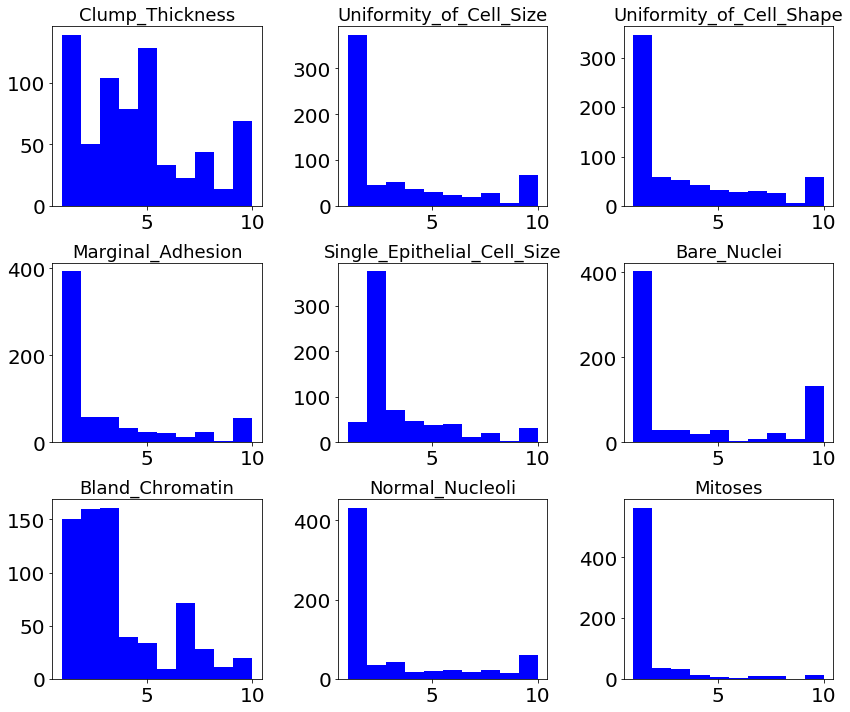

In [6]:
plt.close('all')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,figsize=(12,10))

ax1.hist(df_sel[cols[1]], color='blue')
ax1.set_title(cols[1], fontsize=18)
ax2.hist(df_sel[cols[2]], color='blue')
ax2.set_title(cols[2], fontsize=18)
ax3.hist(df_sel[cols[3]], color='blue')
ax3.set_title(cols[3], fontsize=18)
ax4.hist(df_sel[cols[4]], color='blue')
ax4.set_title(cols[4], fontsize=18)
ax5.hist(df_sel[cols[5]], color='blue')
ax5.set_title(cols[5], fontsize=18)
ax6.hist(df_s[cols[6]], color='blue')
ax6.set_title(cols[6], fontsize=18)
ax7.hist(df_sel[cols[7]], color='blue')
ax7.set_title(cols[7], fontsize=18)
ax8.hist(df_sel[cols[8]], color='blue')
ax8.set_title(cols[8], fontsize=18)
ax9.hist(df_sel[cols[9]], color='blue')
ax9.set_title(cols[9], fontsize=18)

plt.tight_layout()
plt.show(fig)
plt.close('all')

In [7]:
## Check the percentage of malign vs benign:
df_sel.describe(include='all')
#df_sel.head()

print('% Malign:', '{:2.1f}'.format(df[df['Class'].values == 4]['Bare_Nuclei'].count()/df['Bare_Nuclei'].count()*100))
print('% Bening:', '{:2.1f}'.format(df[df['Class'].values == 2]['Bare_Nuclei'].count()/df['Bare_Nuclei'].count()*100))

print('Our dataset is imbalanced!')

% Malign: 35.0
% Bening: 65.0
Our dataset is imbalanced!


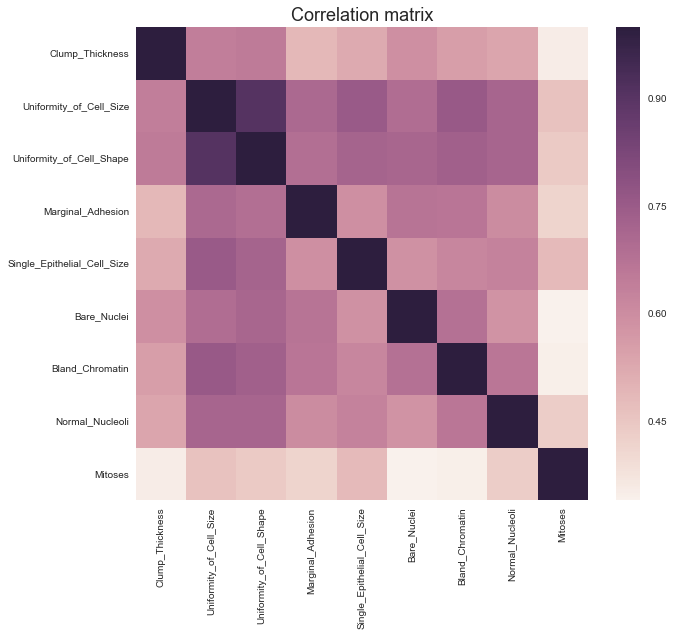

In [8]:
## Let's check correlation between variables using the heatmap
import seaborn as sns
sns.set()

plt.close('all')
fig, ax = plt.subplots(figsize=(10,9))

corr = df_sel.corr()
sns.heatmap(corr, vmax=1.0)
ax.set_title('Correlation matrix', size=18)

plt.tight_layout()
plt.show(fig)
plt.close('all')

## Separate the dataset into training and test:

In [9]:
##Separate the dataset into a 80% training and 20% test:

from sklearn.model_selection import train_test_split

df_Train = df_sel.sample(frac=0.80)
df_Test = df_sel.loc[~df_sel.index.isin(df_Train.index)]

## Separate the dataset into a 80% training and 20% test (will not touch for final validation):
X_Train, X_Test, y_Train, y_Test = train_test_split(df_sel.drop('Class',1), df_sel.Class, test_size=0.20, random_state=1, 
                                                    stratify=df_sel.Class)
print('Training:', X_Train.shape, y_Train.shape, 'Test:', X_Test.shape, y_Test.shape)
#y_Test.head()


Training: (546, 9) (546,) Test: (137, 9) (137,)


#### Our dataset is imbalanced, but a ratio of 65-35% is something we can deal with (it's not like 90-10...)
## Let's apply a classification algorithm:

## Logistic regression:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(class_weight='balanced')
lr = lr.fit(X_Train, y_Train)
lr.score(X_Train, y_Train)

y_model = lr.predict(X_Test)
probabilities_lr = lr.predict_proba(X_Test)

print('Accuracy', metrics.accuracy_score(y_Test, y_model))

Accuracy 0.978102189781


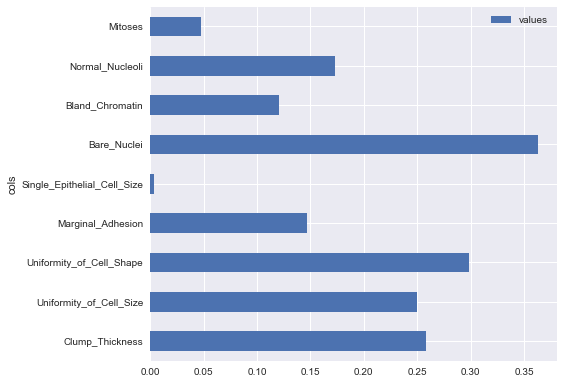

In [11]:
## Feature importance:
features = pd.DataFrame()
features['cols'] = cols[1:-1]
features['values'] = lr.coef_[0]

plt.close()
features.plot(features['cols'], kind='barh', legend='True', sort_columns=True)

#performance = features.sort_index(by='values', ascending=False, sort_remaining=True)
#performance.plot(features['cols'], kind='barh', legend='True')

plt.tight_layout()
plt.show()



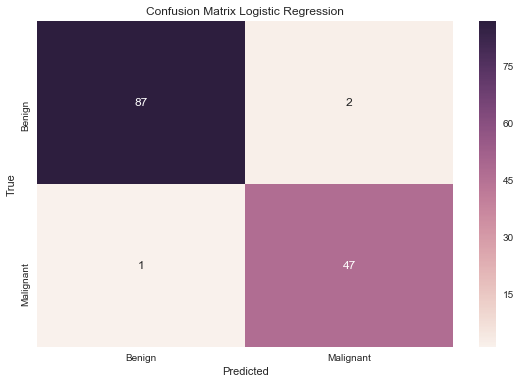

In [16]:
## Confusion matrix
plt.close()
sns.heatmap(metrics.confusion_matrix(y_Test, y_model), annot=True, xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Logistic Regression')

plt.tight_layout()
plt.show()


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', min_samples_leaf=2, 
                                      min_samples_split=5, criterion='gini')

rf_model.fit(X_Train, y_Train)
y_pred_train = rf_model.predict(X_Train)
y_pred = rf_model.predict(X_Test)

print('Training Score:', rf_model.score(X_Train, y_Train))
print('Test Score:',rf_model.score(X_Test, y_Test))

Training Score: 0.983516483516
Test Score: 0.978102189781


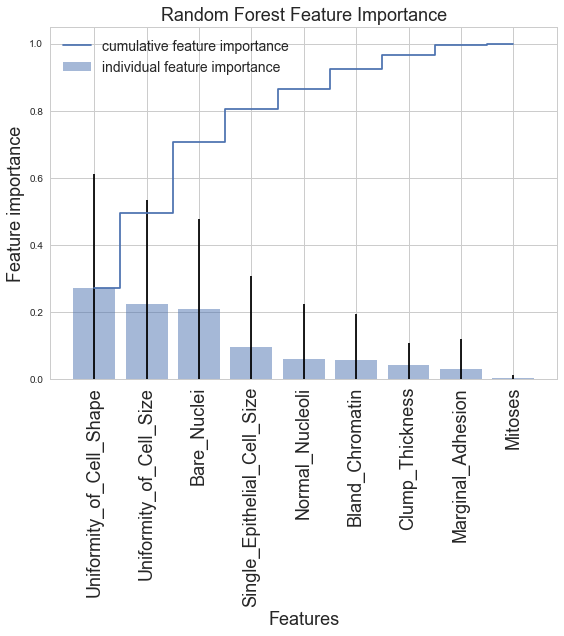

In [14]:
features_rf = rf_model.feature_importances_
idx = sorted(range(len(features_rf)), key=lambda x:features_rf[x], reverse=True)
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
cols_sorted_rf = np.array(cols[1:-1])[idx]
features_importance_acc = np.cumsum(features_rf[idx])

## Plot feature importances
with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(8,9))
    
    plt.bar(range(len(idx)), features_rf[idx], yerr=std[idx], alpha=0.5, align='center', label='individual feature importance')
    plt.step(range(len(idx)), features_importance_acc, where='mid', label='cumulative feature importance')
    plt.xticks(range(len(idx)), cols_sorted_rf, rotation='vertical', fontsize=18)
    plt.title('Random Forest Feature Importance', fontsize=18)
    plt.ylabel('Feature importance', fontsize=18)
    plt.xlabel('Features', fontsize=18)
    plt.ylim((0,1.05))
    plt.legend(loc='best', fontsize=14)
    plt.tight_layout()
    plt.show()


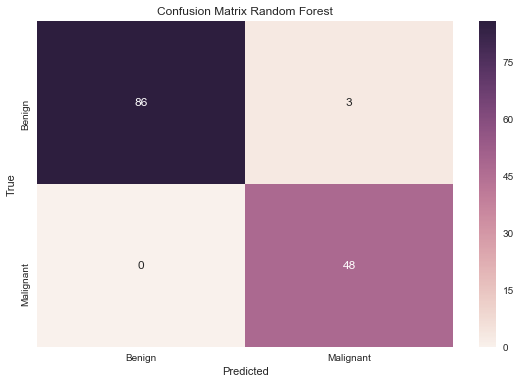

In [17]:
## Confusion matrix
plt.close()
sns.heatmap(metrics.confusion_matrix(y_Test, y_pred), annot=True, xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Random Forest')

plt.tight_layout()
plt.show()

### Very similar results applying LR and RF!